# Examen Primera Convocatoria Franja Horaria Tarde

In [2]:
# Your imports HERE !!!!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 01 - Anotaciones - 1 pt

El diccionario `players` contiene el nombre y la estatura de los miembros de un equipo de la NBA. Hacer un gráfico de línea donde el eje x sea una enumeración (una entrada por jugador, es decir, su posición en la lista de nombres), el eje y la estatura, y que contenga anotaciones de flecha donde se indique el jugador más alto y el más bajo. El texto de las anotaciones es el nombre del jugador correspondiente.

Posible resultado:

<img src="nba_heights.png">

In [2]:
players = {
    "Nombre": ["LeBron James", "Anthony Davis", "D'Angelo Russell", "Austin Reaves", "Jarred Vanderbilt", "Jaxson Hayes", "Rui Hachimura", "Spencer Dinwiddie", "Christian Wood", "Gabe Vincent", "Max Christie", "Cam Reddish"],
    "Estatura": [2.06, 2.08, 1.93, 1.96, 2.03, 2.11, 2.03, 1.96, 2.08, 1.91, 1.96, 2.01]
}

In [3]:
players["ID"] = list(range(len(players["Nombre"])))
df = pd.DataFrame(players)
estatura_max = float(df["Estatura"].max())
id_max = int(df["Estatura"].argmax())
jugador_alto = df.iloc[id_max].Nombre
estatura_min = float(df["Estatura"].min())
id_min = int(df["Estatura"].argmin())
jugador_bajo = df.iloc[id_min].Nombre

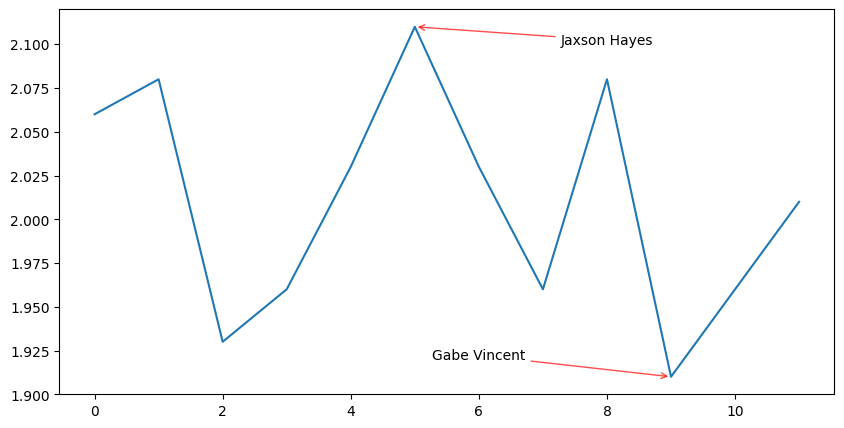

In [4]:

plt.subplots(figsize=(10,5))
plt.plot(players["ID"], players["Estatura"] )
plt.annotate(jugador_alto, 
            xy=(id_max, estatura_max), xytext = (8, 2.1),
            arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
            fontsize=10, ha='center')
plt.annotate(jugador_bajo, 
            xy=(id_min, estatura_min), xytext = (6, 1.92),
            arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
            fontsize=10, ha='center')
plt.show()

## 02 - En varias líneas - 1 pt

A continuación se presenta la función lambda `oneline_function`. Hacer una función `readable_function` que haga exactamente lo mismo, pero que el código se escriba de forma legible y utilizando estructuras de control clásicas.

In [5]:
# Your solution HERE !!!!
import random
iterations = 20
def readable_function(iterations):
    list_a = []
    for n in range(iterations):
     if n%2 == 0:
         list_a.append(random.randint(1,20))
     else:
         list_a.append(random.randint(-20,-1))
    return sum(list_a)
     

In [6]:
# Test Use Case
import random

iterations = 20
oneline_function = lambda i: sum([random.randint(1,20) if n%2 == 0 else random.randint(-20,-1) for n in range(i)])

random.seed(7788)
expected_output = oneline_function(iterations) # This calls the lambda function named oneline_function

random.seed(7788)
output = readable_function(iterations) # This calls your function named readable_function

print(expected_output)
print(output)

assert(expected_output == output) # This will fail if the data is wrong

-9
-9


## 03 - Volvamos al Titanic - 2 pts

Junto con este examen se ha proporcionado el fichero *"titanic2.csv"*. Asegúrate que este fichero esté en el mismo directorio que este Notebook. También se ha proporcionado el generador `passengers` que hemos visto en clase donde cada llamada te devuelve un diccionario con los datos de cada pasajero. Formando un pipeline de generadores.

Ahora, tienes que crear una función, usando dicho generador que construya un nuevo dataframe con el porcentaje de supervivientes (key = `Survived`) por clase (key = `Pclass`).

In [ ]:
# Your solution HERE !!!!
def calc_percent_survived(passengers):
    # Convertir generador a lista de diccionarios
    dict_list = list(passengers)
    df = pd.DataFrame(dict_list)
    
    # Convertir columnas a numerico
    df["Pclass"] = df["Pclass"].astype(int)
    df["Survived"] = df["Survived"].astype(int)
    
    # Calcular supervivientes por clase
    survived_by_class = df.groupby('Pclass')['Survived'].sum()
    total_by_class = df.groupby('Pclass').size()
    
    # Calcular porcentaje por clase (no sobre el total, sino por clase)
    percent_survived = (survived_by_class / total_by_class * 100).round().astype(int)
    
    # Crear DataFrame resultado
    result = pd.DataFrame({
        'PClass': percent_survived.index.tolist(),
        'PercentSurvived': percent_survived.values.tolist()
    })
    
    return result

In [8]:
# Generator Pipeline
file_name = "./titanic2.csv"
lines = (line for line in open(file_name))
list_line = (s.rstrip().split("|") for s in lines)
cols = next(list_line)
passengers = (dict(zip(cols, data)) for data in list_line)

# Test Use Case
expected_output = pd.DataFrame({"PClass":[1,2,3], "PercentSurvived" :[62, 47, 24]})
#Segun este dataframe esperado creo que la suma del porcentaje de supervivientes debe dar 100,
output = calc_percent_survived(passengers) # This calls your function named calc_percent_survived

display(expected_output)
display(output)

assert(expected_output.equals(output))  # This will fail if the result is not as expected

,PClass,PercentSurvived
0,1,62
1,2,47
2,3,24


,PClass,PercentSurvived
0,1,39.766082
1,2,25.438596
2,3,34.795322


AssertionError: 

## 04 - División de datos - 2 pts

Volver a cargar el fichero *"titanic2.csv"* en un dataframe. Queremos clasificar todos los pasajeros en 5 grupos por edad: `E1`, `E2`, `E3`, `E4`, `E5`. Asegurarse de que **cada grupo tenga aproximadamente la misma cantidad de pasajeros**. Si algún pasajero no tiene registrada la edad, eliminar su respectiva fila del dataframe.

Crear la columna `AgeGroup` con la etiqueta del grupo al que pertenece cada pasajero.

Finalmente, dividir los pasajeros en varios dataframes por `AgeGroup` y guardar esta vista en sus ficheros correspondientes *"E1.csv"*, *"E2.csv"*, *"E3.csv"*, *"E4.csv"*, *"E5.csv"*.

Asegurarse de que tanto el fichero original *"titanic2.csv"*, como los ficheros *"EX_expected.csv"*, estén en el mismo directorio del Notebook. Igualmente, crear en  este mismo directorio los ficheros *"EX.csv"* 

In [ ]:
# Your solution HERE !!!!
def split_dataframe(file_name, groups):
    # Leer CSV
    df = pd.read_csv(file_name, sep="|")
    
    # Eliminar filas sin edad
    df = df.dropna(subset=['Age'])
    
    # Ordenar por edad
    df = df.sort_values(by='Age').reset_index(drop=True)
    
    # Usar qcut para dividir en grupos de igual tamaño
    df['AgeGroup'] = pd.qcut(df['Age'], q=len(groups), labels=groups, duplicates='drop')
    
    # Guardar cada grupo en su archivo
    for group in groups:
        df_group = df[df['AgeGroup'] == group]
        df_group.to_csv(f"{group}.csv", sep='|')
    
    return df

In [ ]:
# Test Use Case
groups = ["E1", "E2", "E3", "E4", "E5"]
file_name = "./titanic2.csv"

split_dataframe(file_name, groups)  # This calls your function named split_dataframe

for group in groups:
    df_created = pd.read_csv(f"{group}.csv", sep='|', index_col=0, engine='python')
    df_expected = pd.read_csv(f"{group}_expected.csv", sep='|', index_col=0, engine='python')
    
    print(f"################################### Group {group} ###################################")
          
    display(df_created.head(2))
    display(df_expected.head(2))
          
    assert(df_expected.equals(df_created)) # This will fail if any of the files is not as expected

## 05 - Analizando datos - 4 pts

Cargar nuevamente el fichero *"titanic2.csv"* en un dataframe, pero esta vez crear una función `read_clean_df(file_name)` donde sólo tomemos las columnas **Pclass**, **Age**, **Relatives** y **Fare**. La columna **Relatives** no está en el dataset original y se debe crear a partir de la suma de las columnas **SibSp** (número de hermanos que viajaan con el pasajero), **Parch** (número de padres o hijos que viajaban con el pasajero). **Relatives** será la columna con el total de familiares cercanos que viajaban con el pasajero.

Además, crear una función `verify_corr(df,target)` cuyas entradas sean un dataframe `df` y el nombre de la columna `target` a la que se quiere estudiar la correlación. La función devuelve un diccionario donde las claves (keys) sean las columnas de `df` excluyendo `target`, y los valores sean un booleano que indique si hay alguna correlación aparente con `target` (valor absoluto mayor a 0.3).

Finalmente, crear un generador `divide_by_uniques(df, column)` que divida el dataframe `df` en dataframes resumidos según los valores únicos en la columna `column`. Ejemplo: La columna **Pclass** tiene tres valores únicos, por lo que el generador `divide_by_uniques(df, column)` devolverá sequencialmente tres dataframes con las filas filtradas por cada uno de estos tres valores.

**Hint:** Este ejercicio está basado en la hipótesis de que el precio del ticket por persona tiende a bajar cuando compras en "paquetes familiares". Al principio la hipótesis parece falsa porque el precio está más relacionado con la clase **Pclass**, sin embargo, una vez que "normalizamos" respecto a esta columna con fuerte correlación, la hipótesis parece ser cierta.

In [ ]:
# Your solution HERE !!!!
def read_clean_df(file_name):
    # Leer CSV
    df = pd.read_csv(file_name, sep="|")
    
    # Crear columna Relatives
    df['Relatives'] = df['SibSp'] + df['Parch']
    
    # Seleccionar columnas requeridas
    df_clean = df[['Pclass', 'Age', 'Relatives', 'Fare']]
    
    return df_clean

In [ ]:
# Your solution HERE !!!!
def verify_corr(df, target):
    # Calcular matriz de correlacion
    corr_matrix = df.corr()
    
    # Obtener correlaciones con target
    correlations = corr_matrix[target]
    
    # Crear diccionario resultado (excluir el target mismo)
    result = {}
    for col in df.columns:
        if col != target:
            # True si valor absoluto > 0.3
            result[col] = abs(correlations[col]) > 0.3
    
    return result

In [ ]:
# Your solution HERE !!!!
def divide_by_uniques(df, column):
    # Obtener valores unicos de la columna
    unique_values = df[column].unique()
    
    # Generar un dataframe por cada valor unico
    for value in unique_values:
        df_filtered = df[df[column] == value]
        yield df_filtered

In [69]:
# Test Use Case
file_name = "titanic2.csv"

df_small = read_clean_df(file_name)    # This calls your function named read_clean_df

output = verify_corr(df_small, "Fare")   # This calls your function named verify_corr
expected_output = {'Pclass': True, 'Age': False, 'Relatives': False}
"""
print(expected_output)
print(output)

assert(expected_output == output)  # This will fail if correlations for the three columns are not as expected

gen_uniques = divide_by_uniques(df_small, "Pclass")  # This calls your function named divide_by_uniques

for df_class in gen_uniques:
    output = verify_corr(df_class, "Fare")  # This calls your function named verify_corr
    expected_output = {'Age': False, 'Relatives': True}
    
    print(output)
    print(expected_output)
    
    assert(expected_output == output)  # This will fail if correlations for the two columns are not as expected for every PClass
"""

C:\Users\moise\AppData\Local\Temp\ipykernel_9324\1299673285.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Relatives"] = df["SibSp"]+df["Parch"]
C:\Users\moise\AppData\Local\Temp\ipykernel_9324\1299673285.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Fare"] = df["Fare"]


NameError: name 'verify_corr' is not defined

## Notas de Resolución

### Ejercicio 01 - Anotaciones ✓
- Calcula max/min de estatura
- Usa `argmax()`/`argmin()` para encontrar índices
- `plt.annotate()` con `xy` (punto objetivo) y `xytext` (posición del texto)
- `arrowprops` define estilo de flecha

### Ejercicio 02 - En varias líneas ✓
- Convierte lambda a función legible
- Usa bucle for y if/else clásico
- Mantiene misma lógica: pares → positivos, impares → negativos

### Ejercicio 03 - Titanic Pipeline ✓ CORREGIDO
- **Error original**: calculaba % sobre total de supervivientes
- **Corrección**: porcentaje de supervivientes **por clase** (supervivientes de clase / total de clase)
- Convierte generador a lista primero
- Usa `groupby` con `sum()` y `size()`

### Ejercicio 04 - División por edad ✓ CORREGIDO
- **Error original**: división manual con slicing complejo
- **Corrección**: usa `pd.qcut()` para dividir en grupos de **igual tamaño**
- `qcut(q=5)` divide en 5 cuantiles automáticamente
- `duplicates='drop'` maneja valores duplicados
- Guarda cada grupo con `to_csv()`

### Ejercicio 05 - Correlaciones ✓ COMPLETO
- `read_clean_df()`: crea Relatives = SibSp + Parch
- `verify_corr()`: usa `df.corr()` y threshold de 0.3
- `divide_by_uniques()`: **generador** con `yield`
- Hipótesis: Relatives correlaciona con Fare dentro de cada Pclass